## 2c

### PDMS Results

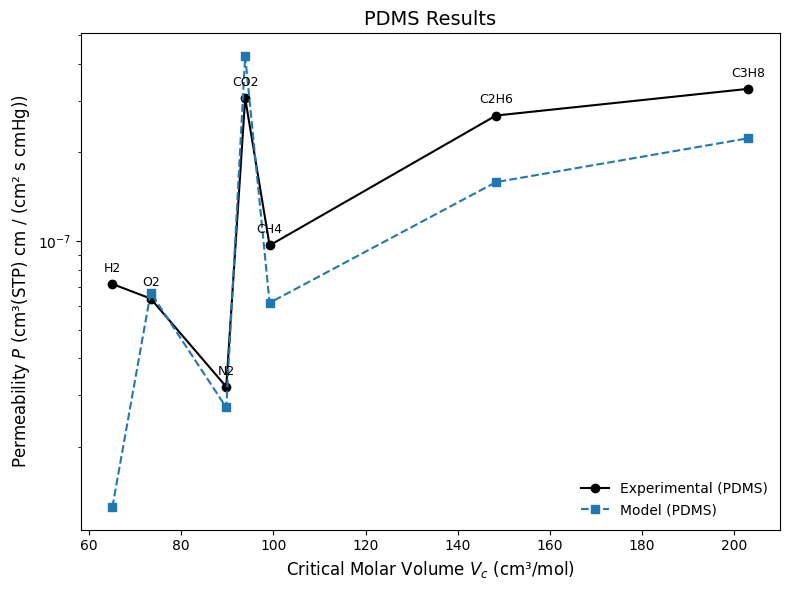

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Experimental data from the problem statement
pdms_penetrants = ['H2', 'O2', 'N2', 'CO2', 'CH4', 'C2H6', 'C3H8']
Vc = np.array([65.1, 73.4, 89.8, 93.9, 99.2, 148.3, 203.0])  # cm³/mol
Tc = np.array([33.24, 154.58, 126.2, 304.21, 191.05, 305.35, 369.95])  # K
P_exp = np.array([7.15e-8, 6.38e-8, 3.20e-8, 3.06e-7, 9.67e-8, 2.67e-7, 3.29e-7])  # cm³(STP) cm / (cm² s cmHg)

def permeability_model(Vc, Tc, tau, eta, M):
    return (tau * np.exp(M + 0.016 * Tc)) / (Vc ** eta)

tau_PDMS = 0.43
eta_PDMS = 2.2
M_PDMS = -8.7

P_model_PDMS = permeability_model(Vc, Tc, tau_PDMS, eta_PDMS, M_PDMS)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(Vc, P_exp, 'o-', label='Experimental (PDMS)', color='black')
plt.plot(Vc, P_model_PDMS, 's--', label='Model (PDMS)', color='tab:blue')

for i, name in enumerate(pdms_penetrants):
    plt.annotate(name, (Vc[i], P_exp[i]*1.1), fontsize=9, ha='center')

plt.xscale('linear')
plt.yscale('log')
plt.xlabel('Critical Molar Volume $V_c$ (cm³/mol)', fontsize=12)
plt.ylabel('Permeability $P$ (cm³(STP) cm / (cm² s cmHg))', fontsize=12)
plt.title('PDMS Results', fontsize=14)
plt.legend(frameon = False)
plt.tight_layout()
# plt.savefig("/Users/mohan/Desktop/PDMS_results.png", dpi = 450)
plt.show()


### PSF Results

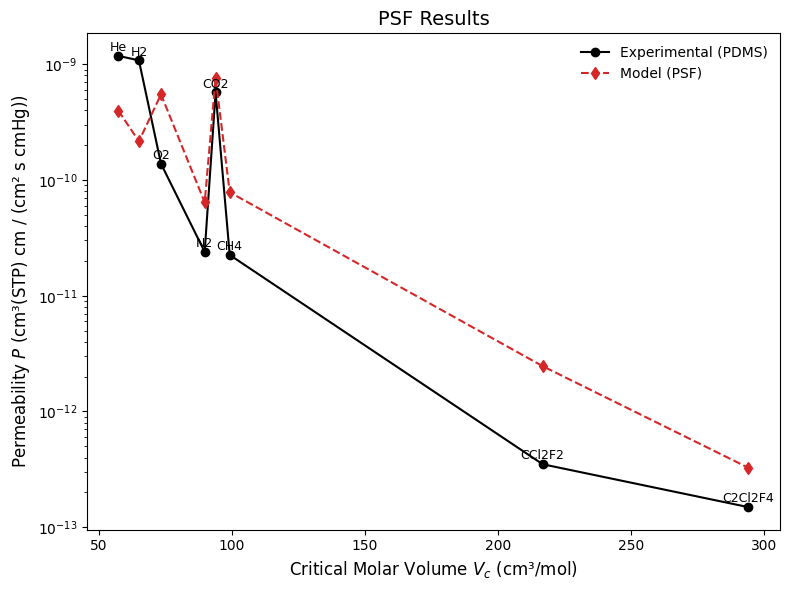

In [16]:
pdms_penetrants = ['He', 'H2', 'O2', 'N2', 'CO2', 'CH4', 'CCl2F2', 'C2Cl2F4']
Vc = np.array([57.4, 65.1, 73.4, 89.8, 93.9, 99.2, 216.7, 294])  # cm³/mol
Tc = np.array([5.19, 33.24, 154.58, 126.2, 304.21, 191.05, 385, 418.75])  # K
P_exp = np.array([1.18e-9, 1.08e-9, 1.38e-10, 2.39e-11, 5.7e-10, 2.25e-11, 3.5e-13, 1.49e-13])  # cm³(STP) cm / (cm² s cmHg)

tau_PSF = 4.8e8
eta_PSF = 8.4
M_PSF = -7.7

P_model_PSF = permeability_model(Vc, Tc, tau_PSF, eta_PSF, M_PSF)

plt.figure(figsize=(8, 6))
plt.plot(Vc, P_exp, 'o-', label='Experimental (PDMS)', color='black')
plt.plot(Vc, P_model_PSF, 'd--', label='Model (PSF)', color='tab:red')

for i, name in enumerate(pdms_penetrants):
    plt.annotate(name, (Vc[i], P_exp[i]*1.1), fontsize=9, ha='center')

plt.xscale('linear')
plt.yscale('log')
plt.xlabel('Critical Molar Volume $V_c$ (cm³/mol)', fontsize=12)
plt.ylabel('Permeability $P$ (cm³(STP) cm / (cm² s cmHg))', fontsize=12)
plt.title('PSF Results', fontsize=14)
plt.legend(frameon = False)
plt.tight_layout()
# plt.savefig("/Users/mohan/Desktop/PSF_results.png", dpi = 450)
plt.show()


## 2d

Looking up $T_c$ and $V_c$ from *Yaws' Handbook of Thermodynamic and Physical Properties of Chemical Compounds: Physical, Thermodynamic and Transport Properties for 5,000 Organic Chemical Compounds*

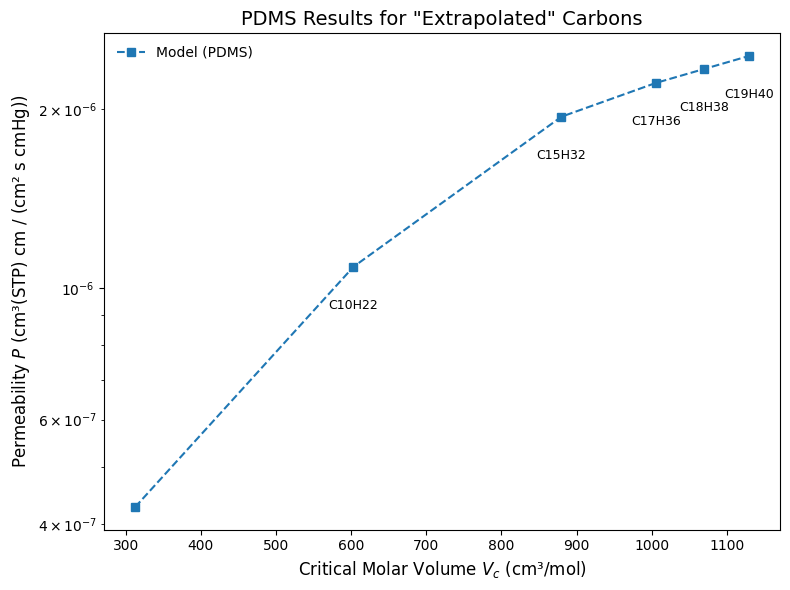

In [ ]:
molecules = ["C5H12", "C10H22", "C15H32", "C17H36", "C18H38", "C19H40"]

Tc = np.array([469.65, 618.45, 706.8, 733.37, 745.26, 755.93]) # K
Vc = np.array([312.3, 603.1, 880, 1005.8, 1070, 1130]) # cm^3/mol

tau_PDMS = 0.43
eta_PDMS = 2.2
M_PDMS = -8.7

P_model_PDMS = permeability_model(Vc, Tc, tau_PDMS, eta_PDMS, M_PDMS)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(Vc, P_model_PDMS, 's--', label='Model (PDMS)', color='tab:blue')

for i, name in enumerate(molecules):
    plt.annotate(name, (Vc[i], P_model_PDMS[i]*0.85), fontsize=9, ha='center')

plt.xscale('linear')
plt.yscale('log')
plt.xlabel('Critical Molar Volume $V_c$ (cm³/mol)', fontsize=12)
plt.ylabel('Permeability $P$ (cm³(STP) cm / (cm² s cmHg))', fontsize=12)
plt.title('PDMS Results for "Extrapolated" Carbons', fontsize=14)
plt.legend(frameon = False)
plt.tight_layout()
# plt.savefig("/Users/mohan/Desktop/PDMS_results_carbons.png", dpi = 450)
plt.show()

## 2e)

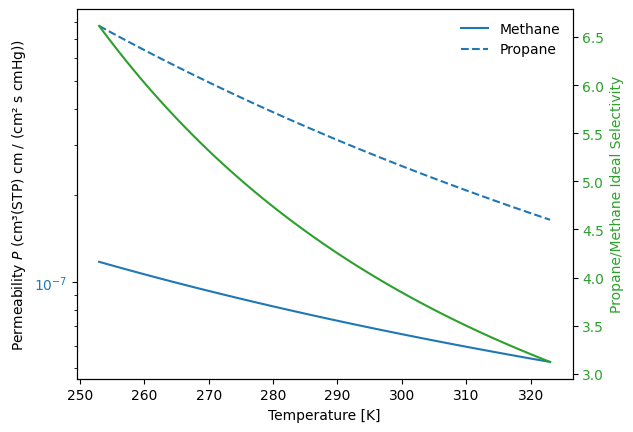

In [38]:
temp_range = np.linspace(253, 323, 100)

def temp_permeability_model(Vc, Tc, tau, eta, M, T):
    return (tau * np.exp(M + 4.9 * (Tc/T))) / (Vc ** eta)

methane_values = {"Tc": 191.05, "Vc": 99.2}
propane_values = {"Tc": 369.95, "Vc": 203.0}

tau_PDMS = 0.43
eta_PDMS = 2.2
M_PDMS = -8.7

methane_permeability_temp = temp_permeability_model(Vc = methane_values["Vc"], Tc = methane_values["Tc"], tau = tau_PDMS, eta = eta_PDMS, M = M_PDMS, T = temp_range)
propane_permeability_temp = temp_permeability_model(Vc = propane_values["Vc"], Tc = propane_values["Tc"], tau = tau_PDMS, eta = eta_PDMS, M = M_PDMS, T = temp_range)

fig, ax1 = plt.subplots() 
 
color = 'tab:blue'
ax1.set_xlabel("Temperature [K]")
ax1.set_ylabel('Permeability $P$ (cm³(STP) cm / (cm² s cmHg))')
ax1.plot(temp_range, methane_permeability_temp, label = "Methane", color = color) 
ax1.plot(temp_range, propane_permeability_temp, label = "Propane", linestyle = "--", color = color) 
ax1.set_yscale('log')
ax1.tick_params(axis ='y', labelcolor = color) 
ax1.legend(frameon = False)

ax2 = ax1.twinx() 

color = 'tab:green'
ax2.set_ylabel('Propane/Methane Ideal Selectivity', color = color) 
ax2.plot(temp_range, (propane_permeability_temp/methane_permeability_temp), color = color) 
ax2.tick_params(axis ='y', labelcolor = color) 
plt.show();

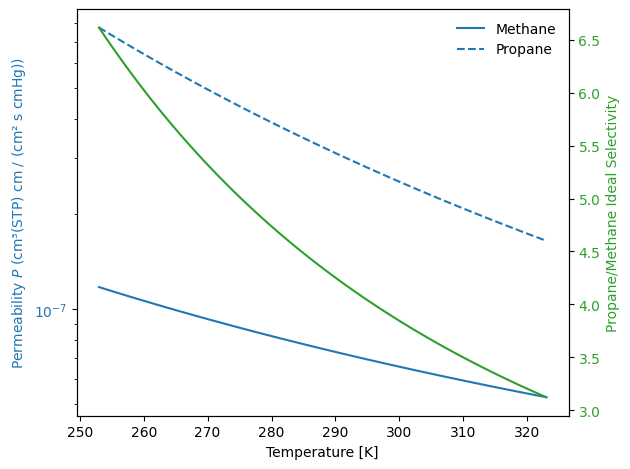

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator, NullFormatter

# Temperature range
temp_range = np.linspace(253, 323, 100)

# Permeability model
def temp_permeability_model(Vc, Tc, tau, eta, M, T):
    return (tau * np.exp(M + 4.9 * (Tc / T))) / (Vc ** eta)

# Constants
methane_values = {"Tc": 191.05, "Vc": 99.2}
propane_values = {"Tc": 369.95, "Vc": 203.0}

tau_PDMS = 0.43
eta_PDMS = 2.2
M_PDMS = -8.7

# Calculate permeability
methane_perm = temp_permeability_model(Vc=methane_values["Vc"], Tc=methane_values["Tc"],
                                        tau=tau_PDMS, eta=eta_PDMS, M=M_PDMS, T=temp_range)

propane_perm = temp_permeability_model(Vc=propane_values["Vc"], Tc=propane_values["Tc"],
                                        tau=tau_PDMS, eta=eta_PDMS, M=M_PDMS, T=temp_range)

# Plotting
fig, ax1 = plt.subplots()

# Axis 1 (left)
color_methane = 'tab:blue'
color_propane = 'tab:blue'
ax1.set_xlabel("Temperature [K]")
ax1.set_ylabel('Permeability $P$ (cm³(STP) cm / (cm² s cmHg))', color=color_methane)
ax1.plot(temp_range, methane_perm, label="Methane", color=color_methane)
ax1.plot(temp_range, propane_perm, label="Propane", linestyle="--", color=color_propane)

# Log scale + more ticks
ax1.set_yscale('log')
ax1.yaxis.set_major_locator(LogLocator(base=10.0, numticks=10))
ax1.yaxis.set_minor_locator(LogLocator(base=10.0, subs=np.arange(2, 10)*0.1, numticks=100))
ax1.yaxis.set_minor_formatter(NullFormatter())

ax1.tick_params(axis='y', labelcolor=color_methane)
ax1.legend(frameon=False, loc='upper right')

# Axis 2 (right)
ax2 = ax1.twinx()
color_selectivity = 'tab:green'
selectivity = propane_perm / methane_perm
ax2.set_ylabel('Propane/Methane Ideal Selectivity', color=color_selectivity)
ax2.plot(temp_range, selectivity, color=color_selectivity)
ax2.tick_params(axis='y', labelcolor=color_selectivity)

plt.tight_layout()
plt.show()
